# Modeling the Earth Orbiting Around the Sun

Meagan Rittmanic


In [154]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pint import UnitRegistry
unit = UnitRegistry()

### Exercises

**Exercise:** Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Use `run_ode_solver` to answer this question.

Here are some suggestions about how to proceed:

1.  Look up the Law of Universal Gravitation and any constants you need.  I suggest you work entirely in SI units: meters, kilograms, and Newtons.

2.  When the distance between the Earth and the Sun gets small, this system behaves badly, so you should use an event function to stop when the surface of Earth reaches the surface of the Sun.

3. Express your answer in days, and plot the results as millions of kilometers versus days.

If you read the reply by Dave Rothstein, you will see other ways to solve the problem, and a good discussion of the modeling decisions behind them.

You might also be interested to know that [it's actually not that easy to get to the Sun](https://www.theatlantic.com/science/archive/2018/08/parker-solar-probe-launch-nasa/567197/).

In [184]:
init = State(x=149.60e9, y = 0, vx = 0, vy = -30330)

t_end = 20e10

system = System(init=init, me = 5.972e24, ms = 1.989e30, G = 6.67408e-11, t_end=t_end, r = 149.6e9)

,values
init,x 1.496000e+11 y 0.000000e+00 vx 0....
me,5.972e+24
ms,1.989e+30
G,6.67408e-11
t_end,2e+11
r,1.496e+11


In [185]:
def universal_gravitation(state, system):
    x, y ,vx, vy = state
    unpack(system)
    Pos = Vector(x,y)
    
    Fx, Fy = pol2cart(Pos.angle, (G*me*ms)/(r**2))
    f_grav = Vector(Fx, Fy)
    return f_grav

In [186]:
universal_gravitation(system.init, system)

<Quantity([3.54227932e+22 0.00000000e+00], 'dimensionless')>

In [228]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system) 
    
    a_grav = -(universal_gravitation(state, system)/(me))
    #(universal_gravitation(state, system)/(me))*((86400)**2)
    
    v = Vector(vx, vy)
    a = a_grav
    
    return vx, vy, a.x, a.y


In [229]:
slope_func(system.init, 0, system)

(0.0,
 -30330.0,
 <Quantity(-0.00593147909577054, 'dimensionless')>,
 <Quantity(-0.0, 'dimensionless')>)

In [230]:
def event_func(state, t, system):
    """Return the height of the penny above the sidewalk.
    """
     = state
    z = r-695.5e6
    return z


IndentationError: unexpected indent (<ipython-input-230-3c98ab7e04b1>, line 4)

In [232]:

system.t_end = 2*3.154e7

results, details = run_ode_solver(system, slope_func, max_step = 1e5)
details

,values
sol,None
t_events,[]
nfev,3866
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [233]:
results

,x,y,vx,vy
0.000000e+00,1.496000e+11,0.000000e+00,0.000000e+00,-30330.000000
4.662755e-08,1.496000e+11,-1.414214e-03,-2.765703e-10,-30330.000000
5.129030e-07,1.496000e+11,-1.555635e-02,-3.042274e-09,-30330.000000
5.175658e-06,1.496000e+11,-1.569777e-01,-3.069931e-08,-30330.000000
5.180321e-05,1.496000e+11,-1.571191e+00,-3.072696e-07,-30330.000000
5.180787e-04,1.496000e+11,-1.571333e+01,-3.072973e-06,-30330.000000
5.180834e-03,1.496000e+11,-1.571347e+02,-3.073001e-05,-30330.000000
5.180838e-02,1.496000e+11,-1.571348e+03,-3.073003e-04,-30330.000000
5.180839e-01,1.496000e+11,-1.571348e+04,-3.073004e-03,-30330.000000
5.180839e+00,1.496000e+11,-1.571348e+05,-3.073004e-02,-30330.000000


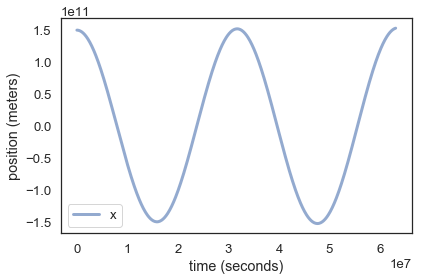

In [238]:
def plot_position_x(results):
    plot(results.x, label = 'x')
    decorate (xlabel='time (seconds)',
             ylabel='position (meters)')

plot_position_x(results)

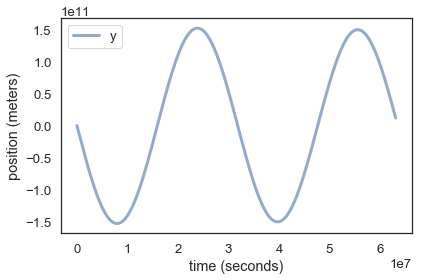

In [239]:
def plot_position_y(results):
    plot(results.y, label = 'y')
    decorate (xlabel='time (seconds)',
             ylabel='position (meters)')

plot_position_y(results)

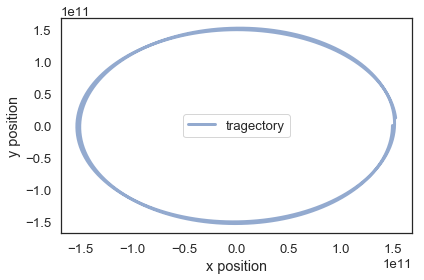

In [240]:
def plot_position_trag(results):
    plot(results.x, results.y, label = 'tragectory')
    decorate (xlabel='x position',
             ylabel='y position')

plot_position_trag(results)

In [70]:
t_crossings = crossings(results.r, 695.5e6)

array([64.55336896])

In [87]:
r1 = get_first_value(results.r)
r2 = get_last_value(results.r)
s1 = get_first_value(results.s)
s2 = get_last_value(results.s)

-53265764225.453766

In [83]:
gpe1=system.me*r1*system.ms*G/(r1)**2
gpe2=system.me*r2*system.ms*G/(r2)**2
gpe1, gpe2

(5.299249856727273e+33, 1.1398530245379224e+36)

In [89]:
ke1 = .5*system.me*(s1)**2
ke2 = .5*system.me*(s2)**2
ke1, ke2

(0.0, 8.472003532625589e+45)

In [30]:
# Solution goes here

In [31]:
# Solution goes here

In [32]:
# Solution goes here

In [33]:
# Solution goes here

In [34]:
# Solution goes here

In [35]:
# Solution goes here

In [36]:
# Solution goes here

In [37]:
# Solution goes here

In [38]:
# Solution goes here